# Support Vector Machine (SVM):

In [1]:
from datasets import *
from qiskit_aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit_aqua.input import get_input_instance
from qiskit_aqua import run_algorithm

## Implementation of a SVM based on the quantum kernel:

### Two-class datasets:

In [2]:
params_two_class = {
    'problem': {'name': 'svm_classification', 'random_seed': 10598},
    'algorithm': {
        'name': 'QSVM.Kernel'
    },
    'backend': {'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}

#### Adhoc dataset of the qiskit alpha tutorial:

{'A': 0, 'B': 1}
kernel matrix during the training:


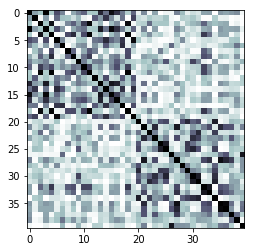

testing success ratio:  1.0
predicted classes: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [3]:
n = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size, 
                                                                     test_size=testing_dataset_size, 
                                                                     n=n, gap=0.3, PLOT_DATA=False)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

algo_input = get_input_instance('SVMInput')
algo_input.training_dataset  = training_input
algo_input.test_dataset = test_input
algo_input.datapoints = datapoints[0] # 0 is data, 1 is labels

result = run_algorithm(params_two_class, algo_input)
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])
print("predicted classes:", result['predicted_classes'])

#### Breast cancer dataset of the qiskit alpha tutorial:

{'A': 0, 'B': 1} {0: 'A', 1: 'B'}
kernel matrix during the training:


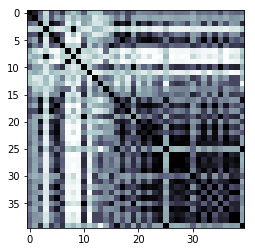

testing success ratio:  0.95
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
predicted:    ['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [4]:
sample_Total, training_input, test_input, class_labels = Breast_cancer(training_size=20, test_size=10, n=2, PLOT_DATA=False)
# n =2 is the dimension of each data point

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
label_to_class = {label:class_name for class_name, label in class_to_label.items()}
print(class_to_label, label_to_class)

algo_input = get_input_instance('SVMInput')
algo_input.training_dataset  = training_input
algo_input.test_dataset = test_input
algo_input.datapoints = datapoints[0]
result = run_algorithm(params_two_class, algo_input)
# print(result)
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])

print("ground truth: {}".format(map_label_to_class_name(datapoints[1], label_to_class)))
print("predicted:    {}".format(result['predicted_classes']))

### Multiclass datasets:

In [5]:
params_multi_class = {
    'problem': {'name': 'svm_classification', 'random_seed': 10598},
    'algorithm': {
        'name': 'QSVM.Kernel'
    },
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entangler_map': {0: [1]}},
    'multiclass_extension': {'name': 'AllPairs'},
    'backend': {'name': 'qasm_simulator', 'shots': 1024}
}

#### Wine dataset of the qiskit alpha tutorial:

In [6]:
n = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = Wine(training_size=40,
                                                              test_size=10, n=n, PLOT_DATA=False)

temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

algo_input = get_input_instance('SVMInput')
algo_input.training_dataset = training_input
algo_input.test_dataset = test_input
algo_input.datapoints = total_array

result = run_algorithm(params_multi_class, algo_input)
for k,v in result.items():
    print("'{}' : {}".format(k, v))

'testing_accuracy' : 0.8260869565217391
'test_success_ratio' : 0.8260869565217391
'predicted_labels' : [0 0 0 0 0 0 1 0 0 0 1 2 1 1 1 0 1 1 1 1 2 0 2]
'predicted_classes' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'C', 'A', 'C']
